In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [15]:
# Generate sample data
np.random.seed(42)
n_samples = 1000
n_features = 20

# Create features (X) with some irrelevant features
X = np.random.randn(n_samples, n_features)

# True coefficients: only first 5 features are relevant
true_coefficients = np.zeros(n_features)
true_coefficients[:5] = [2.0, -1.0, 1.5, -0.5, 1.0]

# Generate target variable with some noise
y = np.dot(X, true_coefficients) + np.random.normal(0, 0.1, n_samples)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Method 1: Using scikit-learn's Lasso
# --------------------------------
# Simple Lasso with fixed alpha (regularization parameter)
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Print results
print("Scikit-learn Lasso Results:")
print("R² Score:", lasso.score(X_test_scaled, y_test))
print("\nFeature coefficients:")
for i, coef in enumerate(lasso.coef_):
    if abs(coef) > 1e-10:  # Only print non-zero coefficients
        print(f"Feature {i}: {coef:.4f}")



Scikit-learn Lasso Results:
R² Score: 0.9934542017881971

Feature coefficients:
Feature 0: 1.8996
Feature 1: -0.8260
Feature 2: 1.3974
Feature 3: -0.3977
Feature 4: 0.9240


In [17]:
# Method 2: Using LassoCV for automatic alpha selection
# --------------------------------
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("\nLassoCV Results:")
print("Best alpha:", lasso_cv.alpha_)
print("R² Score:", lasso_cv.score(X_test_scaled, y_test))
print("\nFeature coefficients:")
for i, coef in enumerate(lasso_cv.coef_):
    if abs(coef) > 1e-10:
        print(f"Feature {i}: {coef:.4f}")


LassoCV Results:
Best alpha: 0.003768926433844753
R² Score: 0.9987784030899423

Feature coefficients:
Feature 0: 1.9981
Feature 1: -0.9286
Feature 2: 1.4880
Feature 3: -0.4908
Feature 4: 1.0168
Feature 19: 0.0008



Statsmodels Lasso Results:

Feature coefficients:
constant: 0.0476
Feature 0: 1.9981
Feature 1: -0.9286
Feature 2: 1.4880
Feature 3: -0.4908
Feature 4: 1.0168
Feature 19: 0.0008


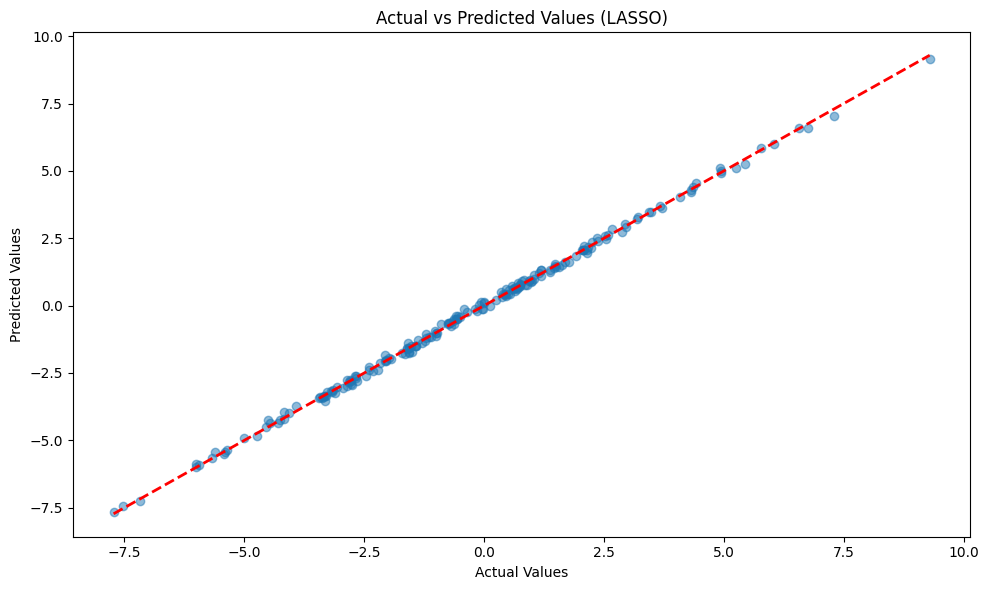

In [18]:
# Method 3: Using statsmodels
# --------------------------------
# Add constant to X
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Fit model
alpha = lasso_cv.alpha_  # Use the CV-selected alpha
model = sm.OLS(y_train, X_train_sm)
results = model.fit_regularized(alpha=alpha, L1_wt=1.0)  # L1_wt=1.0 means pure LASSO

print("\nStatsmodels Lasso Results:")
print("\nFeature coefficients:")
for i, coef in enumerate(results.params):
    if abs(coef) > 1e-10:
        feature_name = "constant" if i == 0 else f"Feature {i-1}"
        print(f"{feature_name}: {coef:.4f}")



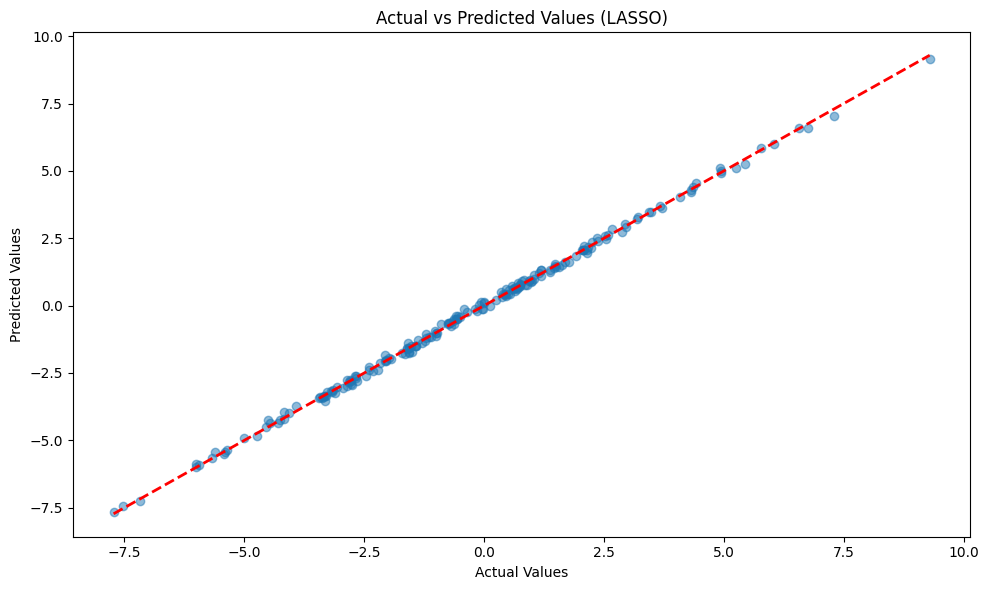

In [21]:
# Plot actual vs predicted values (requires matplotlib)
plt.figure(figsize=(10, 6))
y_pred = lasso_cv.predict(X_test_scaled)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (LASSO)')
plt.tight_layout()
plt.show()